# Visualização de Dados Científicos: Conceitos Avançados

Em Ciência de Dados, a Visualização de Dados é uma fase importante que envolve a representação gráfica de informações. Através de elementos visuais, ela permite a **atribuição de sentido e a comunicação de tendências e padrões nos dados**.

<br>

> **Por que criar visualizações usando Jupyter?** 🤔

Além do suporte simplificado do Jupyter, a linguagem Python oferece uma variedadede bibliotecas e módulos de visualização de dados, como <ins>Matplotlib</ins> e <ins>Seaborn</ins>. Ambas  funcionam  muito  bem para a tarefa de visualização, sendo mais poderosas quando comparadas com os recursos adicionais de plotagem incorporados do Pandas.

<br>

A organização deste notebook é a seguinte:

- [Conteúdo Extra](#extra)
    - [Personalização](#personalizacao)
    - [Gráficos interativos](#interativos)

In [1]:
# Importando os pacotes necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 6)

<a id="extra"></a>

## Conteúdo Extra 

### Personalização

Uma das maiores vantagens de se usar o Matplotlib/Seaborn para gerar gráficos é que você pode **personalizar** absolutamente (ou quase) tudo neles. 

> **DICA:** A quantidade de opções disponíveis para personalização é imensa, e uma das vantagens de se usar uma linguagem de programação tão popular quanto Python é a grande **disponibilidade de exemplos e tutoriais** sobre isso na Internet. 

Aqui, vamos focar em quatro tipos de personalização básicas:

- [Cores](#cores)
- [Estilos](#estilos)
- [Eixos](#eixos)
- [Fontes](#fontes)

Essas personalizações podem transformar os gráficos, deixando-os mais <ins>sofisticados e apresentáveis</ins>.

Para ilustrar melhor, vamos trabalhar com um gráfico de linhas para acompanhar a **evolução da média de streams de músicas solo e colaborações em 2020**. 

In [2]:
# Lendo os dados
df_hits = pd.read_table('../dataset/spotify_hits_dataset_complete.tsv', encoding='utf-8')
df_charts = pd.read_table('../dataset/spotify_charts_complete.tsv', encoding='utf-8', parse_dates=['chart_week'])

In [3]:
# Monta os DataFrames que servirão de base para gerar os gráficos
df_evolution = pd.merge(df_charts, df_hits, on='song_id')[['chart_week', 'song_type', 'streams']]

df_solo = df_evolution[df_evolution['song_type'] == 'Solo'].groupby(by=['chart_week']).mean()
df_collab = df_evolution[df_evolution['song_type'] == 'Collaboration'].groupby(by=['chart_week']).mean()

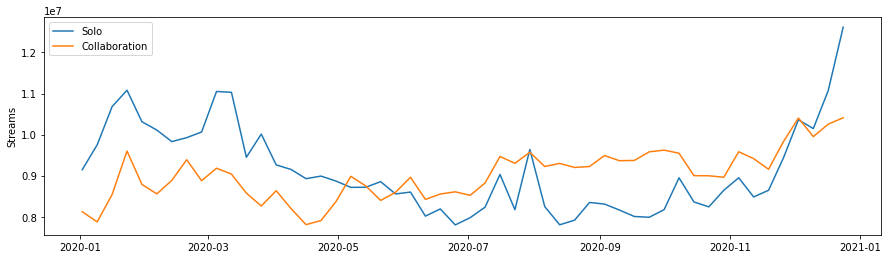

In [4]:
# Define o tamanho da figura
fig, ax = plt.subplots(figsize=(15, 4))        # O tamanho será de 15x4 polegadas (largura, altura)

# Plota a linha de evolução da soma dos streams pra músicas Solo/Collab
ax.plot(df_solo, label="Solo")
ax.plot(df_collab, label="Collaboration")

# Mostra a legenda (cada cor uma tipo)
plt.legend()

# Altera nome dos eixos
plt.xlabel("")                                 # Aqui optei por tirar o nome do eixo x, mas poderia ser 'Data'
plt.ylabel("Streams")

# Exibir e salvar
plt.show()                                     # Esse comando é somente para mostrar a figura aqui embaixo

<a name="cores"></a>
#### Cores

Quando plotamos gráficos no Matplotlib, o pacote geralmente utiliza as cores padrão, que nem sempre são as melhores ou mais apresentáveis. Felizmente, podemos facilmente alterar as cores das coisas que plotamos através do parâmetro `color` da função `plot`. 

O Matplotlib aceita algumas cores [nomeadas](https://matplotlib.org/stable/gallery/color/named_colors.html) e também códigos hexadecimais, RGB e CMYK. 

Aqui, escolhemos a cor de cada linha através de seu código hexadecimal. Por exemplo, para músicas Solo, escolhemos uma cor cujo código é `#1b9e77`.

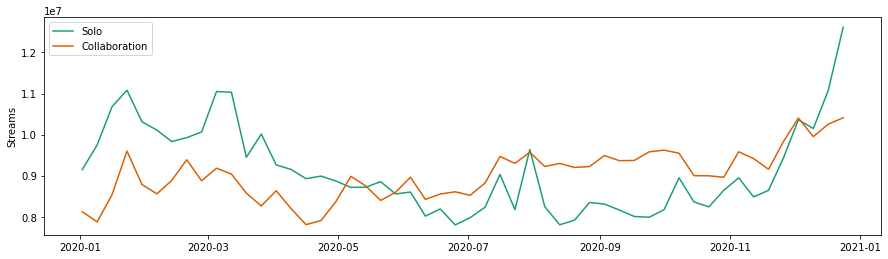

In [5]:
# Define o tamanho da figura
fig, ax = plt.subplots(figsize=(15, 4))        # O tamanho será de 15x4 polegadas (largura, altura)

# Plota a linha de evolução da soma dos streams pra músicas Solo/Collab
ax.plot(df_solo, label="Solo", color="#1b9e77")
ax.plot(df_collab, label="Collaboration", color="#d95f02")

# Mostra a legenda (cada cor uma tipo)
plt.legend()

# Altera nome dos eixos
plt.xlabel("")                                 # Aqui optei por tirar o nome do eixo x, mas poderia ser 'Data'
plt.ylabel("Streams")

# Exibir e salvar
plt.show()                                     # Esse comando é somente para mostrar a figura aqui embaixo

<a name="estilos"></a>
#### Estilos

Um outro ponto que devemos nos preocupar é o estilo das linhas. Na vida profissional, é bastante comum fazer gráficos para serem anexadas em artigos e/ou relatórios, que quase sempre são impressos em escala de cinza. Assim, as cores das linhas que serviam para diferenciá-las umas das outras, perdem sua utilidade pois muitas são impressas em tons muito semelhantes de cinza. 

Portanto, é necessário encontrar uma forma a mais para diferenciá-las. O Matplotlib nos oferece a opção de escolher [estilos variádos](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html) para nossas linhas (contínua, pontilhada, tracejada, etc.) através do parâmetro `linestyle` presente na função `plot`.

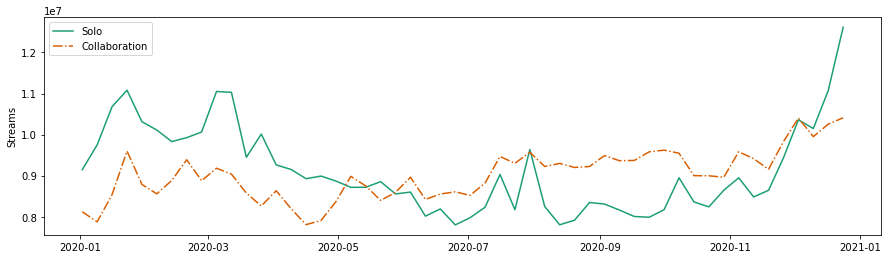

In [6]:
# Define o tamanho da figura
fig, ax = plt.subplots(figsize=(15, 4))        # O tamanho será de 15x4 polegadas (largura, altura)

# Plota a linha de evolução da soma dos streams pra músicas Solo/Collab
ax.plot(df_solo, label="Solo", color="#1b9e77", linestyle="-")
ax.plot(df_collab, label="Collaboration", color="#d95f02", linestyle="-.")

# Mostra a legenda (cada cor uma tipo)
plt.legend()

# Altera nome dos eixos
plt.xlabel("")                                 # Aqui optei por tirar o nome do eixo x, mas poderia ser 'Data'
plt.ylabel("Streams")

# Exibir e salvar
plt.show()                                     # Esse comando é somente para mostrar a figura aqui embaixo

<a name="eixos"></a>
#### Eixos

Os eixos também são partes importantes dos nossos gráficos, pois lá estão contidas informações relevantes sobre escalas, valores de referência e nome das variáveis categóricas. Aqui, nossas alterações focam em dois pontos principais:

- Remoção das bordas da figura do gráfico (através do método `spines`)
- Adição de *grids* internos para facilitar a visualização de pontos no gráfico

In [7]:
from matplotlib.dates import DateFormatter

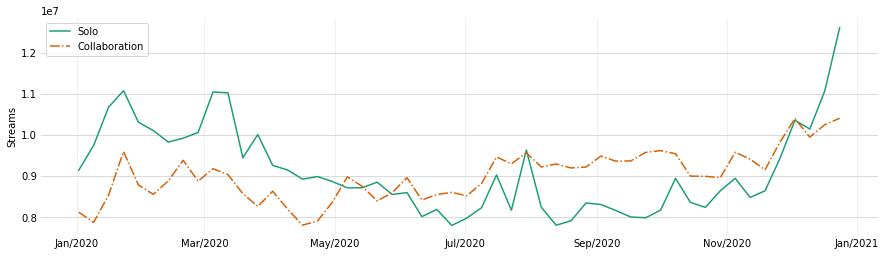

In [8]:
# Define o tamanho da figura
fig, ax = plt.subplots(figsize=(15, 4))        # O tamanho será de 15x4 polegadas (largura, altura)

# Plota a linha de evolução da soma dos streams pra músicas Solo/Collab
ax.plot(df_solo, label="Solo", color="#1b9e77", linestyle="-")
ax.plot(df_collab, label="Collaboration", color="#d95f02", linestyle="-.")

# Mostra a legenda (cada cor uma tipo)
plt.legend()

# Altera nome dos eixos
plt.xlabel("")                                 # Aqui optei por tirar o nome do eixo x, mas poderia ser 'Data'
plt.ylabel("Streams")

# Formata o texto dos eixos
ax.xaxis.set_major_formatter(DateFormatter("%b/%Y")) # Formato da data (%b - abreviação do mês)

# Remove bordas e ticks dos eixos x e y
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)

# Adiciona grid interno
ax.xaxis.grid(linestyle='-', color='#ededed')
ax.yaxis.grid(linestyle='-', color='#d1d1d1')

# Exibir e salvar
plt.show()                                     # Esse comando é somente para mostrar a figura aqui embaixo

<a name="fontes"></a>
#### Fontes

A última personalização desse Notebook diz respeito às fontes usadas no gráfico. O Matplotlib permite ao usuário utilizar qualquer fonte instalada em seu computador nos gráficos. Além disso, o tamanho das fontes nos eixos, legendas e título podem ser alteradas separadamente (ou seja, podemos aplicar valores distintos) para deixar nosso gráfico mais adequado ao seu propósito.

Neste último exemplo, aumentamos o tamanho do texto da legenda e do eixo y através do parâmetro `fontsize`.

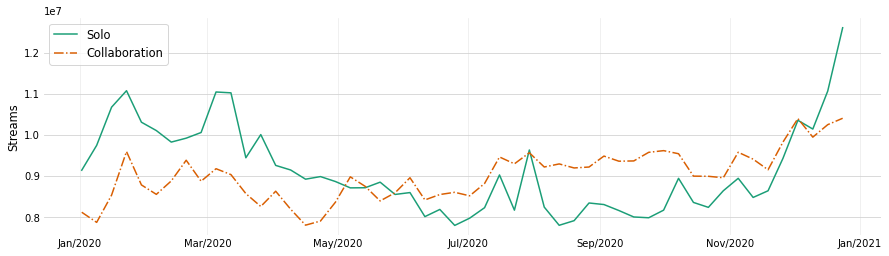

In [9]:
# Define o tamanho da figura
fig, ax = plt.subplots(figsize=(15, 4))        # O tamanho será de 15x4 polegadas (largura, altura)

# Plota a linha de evolução da soma dos streams pra músicas Solo/Collab
ax.plot(df_solo, label="Solo", color="#1b9e77", linestyle="-")
ax.plot(df_collab, label="Collaboration", color="#d95f02", linestyle="-.")

# Mostra a legenda (cada cor uma tipo)
plt.legend(fontsize=11.5)

# Altera nome dos eixos
ax.set_xlabel("")                              # Aqui optei por tirar o nome do eixo x, mas poderia ser 'Data'
ax.set_ylabel("Streams", fontsize=11.5)

# Formata o texto dos eixos
ax.xaxis.set_major_formatter(DateFormatter("%b/%Y")) # Formato da data (%b - abreviação do mês)

# Remove bordas e ticks dos eixos x e y
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)

# Adiciona grid interno
ax.xaxis.grid(linestyle='-', color='#ededed')
ax.yaxis.grid(linestyle='-', color='#d1d1d1')

# Exibir e salvar
#plt.savefig('lineplot.pdf')                    # Salva a imagem em formato PDF 
plt.show()                                     # Esse comando é somente para mostrar a figura aqui embaixo

<br><br>
<a id="interativos"></a>

---

### Gráficos interativos

Uma outra possibilidade do Jupyter é a construção de **ferramentas interativas** com o IPython. Este já é um conceito mais avançado, que será detalhado na próxima parte do curso.

Aqui, vamos nos concentrar na apresentação de gráficos interativos utilizando as bibliotecas `plotly` e `cufflinks`.

> **IMPORTANTE:** Se você ainda não possui essas bibliotecas instaladas, utilize o comando `!pip install plotly & pip install cufflinks` em uma célula separada.

In [10]:
%matplotlib inline
from IPython.display import HTML

import plotly.offline as py
from plotly.offline import iplot
import plotly.graph_objs as go

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

Vamos continuar no exemplo do gráfico de linhas para comparar a evolução da média de streams de músicas solo e colaborações em 2020. 

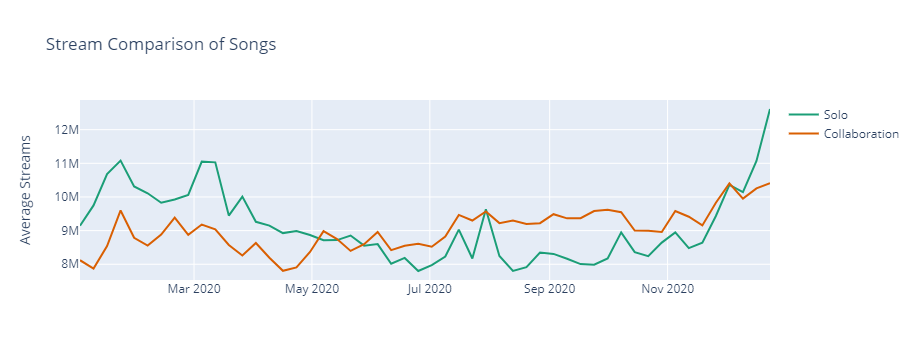

In [11]:
# Conjunto de dados que serão plotados no gráfico interativo
# A variável data contém as duas linhas (Solo/Collab)
data = [go.Scatter(x=df_solo.index, y=df_solo['streams'], marker_color='#1b9e77', name='Solo'),
        go.Scatter(x=df_collab.index, y=df_collab['streams'], marker_color='#d95f02', name='Collaboration')]

# Configura alguns parâmetros do plot, como título e nome dos eixos
layout = go.Layout(title="Stream Comparison of Songs", yaxis=dict(title='Average Streams'))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Agora, vamos para um exemplo mais prático, que é a **matriz de correlação** entre as features acústicas dos `Hits`. 

Esta matriz foi introduzida no notebook anterior, quando discutimos o conceito de correlações.

In [12]:
df_hits.corr()

,popularity,explicit,track_number,...,speechiness,valence,tempo
popularity,1.000000,-0.049697,-0.059673,...,0.010341,0.032775,0.003640
explicit,-0.049697,1.000000,0.113816,...,0.328718,-0.108461,0.072804
track_number,-0.059673,0.113816,1.000000,...,-0.019669,-0.060618,0.006224
num_artists,0.068568,0.133949,-0.050959,...,0.103072,0.162001,0.084059
num_available_markets,0.761699,-0.019580,0.048500,...,0.067078,0.027777,0.016319
duration_ms,0.098094,-0.043412,0.060341,...,-0.096676,-0.125785,0.013603
key,0.015154,-0.028635,-0.032405,...,0.037189,0.054193,-0.022747
mode,-0.061275,-0.063131,0.015148,...,-0.058082,0.006177,0.021584
time_signature,0.031860,0.020660,-0.016637,...,0.078520,0.095659,-0.008865
acousticness,-0.039398,-0.161020,0.073224,...,-0.142528,-0.088887,-0.098731


Quando existem muitas variáveis que desejamos analisar, uma matriz numérica pode não ser a melhor visualização. 

Por isso, podemos plotar um **_heatmap_** (mapa de calor) para visualizar tais correlações.

Uma visualização interativa pode ser bem útil para isso, pois conseguimos visualizar, para cada célula, as variáveis correlacionadas e o valor da correlação.

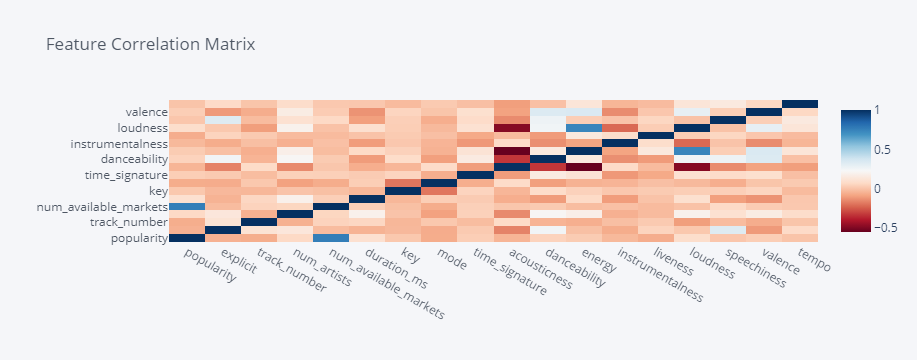

In [13]:
df_hits.corr().iplot(kind='heatmap', 
                     colorscale="RdBu", 
                     title="Feature Correlation Matrix")

---

## Referências e Links Externos

- [Python Graph Gallery](https://www.python-graph-gallery.com/)
- [Matplotlib - Documentação](https://matplotlib.org/stable/api/)
- [Seaborn - Documentação](https://seaborn.pydata.org/)
- [Plotly - documentação](https://plotly.com/python-api-reference/)